In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-sales-data/Walmart_Store_sales.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Colormap

## We will read the data

In [3]:
walmart = pd.read_csv('../input/walmart-sales-data/Walmart_Store_sales.csv',index_col=False)

In [4]:
walmart = pd.DataFrame(walmart)

In [5]:
walmart.reset_index(inplace=True)

In [6]:
walmart.head()

,index,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         6435 non-null   int64  
 1   Store         6435 non-null   int64  
 2   Date          6435 non-null   object 
 3   Weekly_Sales  6435 non-null   float64
 4   Holiday_Flag  6435 non-null   int64  
 5   Temperature   6435 non-null   float64
 6   Fuel_Price    6435 non-null   float64
 7   CPI           6435 non-null   float64
 8   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 452.6+ KB


## Exploring the data

In [8]:
walmart.describe()

,index,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,3217.000000,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,1857.768823,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,0.000000,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,1608.500000,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,3217.000000,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,4825.500000,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,6434.000000,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
walmart.isna().any()

index           False
Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

In [10]:
walmart.groupby(['Weekly_Sales']).min()

,index,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,,,,,,,,
209986.25,4619,33,03-12-2010,0,52.82,3.041,126.731333,9.265
213538.32,4614,33,29-10-2010,0,71.34,3.130,126.436419,9.265
215359.21,4675,33,30-12-2011,1,51.60,3.428,130.071032,8.010
219804.85,4623,33,31-12-2010,1,52.91,3.148,127.087677,9.265
220060.35,4671,33,02-12-2011,0,59.12,3.701,129.845967,8.010
...,...,...,...,...,...,...,...,...
3595903.20,1762,13,24-12-2010,0,34.90,2.846,126.983581,7.795
3676388.98,527,4,23-12-2011,0,35.92,3.103,129.984548,5.143
3749057.69,1333,10,24-12-2010,0,57.06,3.236,126.983581,9.003


### from the 9th row we can clearly see that Max weekly sales is 3.818686e+06, Now  we can also see that the store no 14 contributes to the highest sales figure

In [11]:
std_sales = walmart.groupby(['Store'])['Weekly_Sales'].std()
print(round(std_sales.sort_values(ascending=False),2))

Store
14    317569.95
10    302262.06
20    275900.56
4     266201.44
13    265507.00
23    249788.04
27    239930.14
2     237683.69
39    217466.45
6     212525.86
35    211243.46
19    191722.64
41    187907.16
28    181758.97
18    176641.51
24    167745.68
11    165833.89
22    161251.35
1     155980.77
12    139166.87
32    138017.25
45    130168.53
21    128752.81
31    125855.94
15    120538.65
40    119002.11
25    112976.79
7     112585.47
17    112162.94
26    110431.29
8     106280.83
34    104630.16
29     99120.14
16     85769.68
9      69028.67
36     60725.17
42     50262.93
3      46319.63
38     42768.17
43     40598.41
5      37737.97
44     24762.83
33     24132.93
30     22809.67
37     21837.46
Name: Weekly_Sales, dtype: float64


## The above code calculates the standard deviation of the sales of all the stores and prints them in descending order
### thus we can easily identify that the store 14 has the highest standard deviation i.e  317569.95


In [12]:
## We will store that as a dataframe for our convenience

In [13]:
store_df = pd.DataFrame({'Weekly_Sales_std':round(std_sales,2)})

In [14]:
store_df.head()

,Weekly_Sales_std
Store,
1,155980.77
2,237683.69
3,46319.63
4,266201.44
5,37737.97


In [15]:
walmart['Weekly_Sales'].mean()

1046964.8775617732

In [16]:
Weekly_Sales_mean = round(walmart.groupby(['Store'])['Weekly_Sales'].mean(),2)

In [17]:
Weekly_Sales_mean.reset_index()

,Store,Weekly_Sales
0,1,1555264.40
1,2,1925751.34
2,3,402704.44
3,4,2094712.96
4,5,318011.81
5,6,1564728.19
6,7,570617.31
7,8,908749.52
8,9,543980.55
9,10,1899424.57


In [18]:
store_df = store_df.join(Weekly_Sales_mean)

In [19]:
store_df = store_df.rename(columns={'Weekly_Sales':'Weekly_Sales_mean'})

In [20]:
store_df['coeff_mean_to_std'] = round(store_df.Weekly_Sales_mean/store_df.Weekly_Sales_std,2)

In [21]:
store_df.head(7)

,Weekly_Sales_std,Weekly_Sales_mean,coeff_mean_to_std
Store,,,
1,155980.77,1555264.40,9.97
2,237683.69,1925751.34,8.10
3,46319.63,402704.44,8.69
4,266201.44,2094712.96,7.87
5,37737.97,318011.81,8.43
6,212525.86,1564728.19,7.36
7,112585.47,570617.31,5.07


In [22]:
## As per the question we will find the coeff_mean_to_std of the store with highest std deviation of weekly sales

In [23]:
store_df.sort_values(['Weekly_Sales_std'],ascending=False).head(10)

,Weekly_Sales_std,Weekly_Sales_mean,coeff_mean_to_std
Store,,,
14,317569.95,2020978.40,6.36
10,302262.06,1899424.57,6.28
20,275900.56,2107676.87,7.64
4,266201.44,2094712.96,7.87
13,265507.00,2003620.31,7.55
23,249788.04,1389864.46,5.56
27,239930.14,1775216.20,7.40
2,237683.69,1925751.34,8.10
39,217466.45,1450668.13,6.67


### Since the store 14 was having the highest weekly std deviation, its coefficient of mean to standard deviation is 6.36

## For the question Which store/s has good quarterly growth rate in Q3’2012

In [24]:
walmart.head()

,index,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [25]:
walmart.dtypes

index             int64
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [26]:
walmart['Date']  =(pd.to_datetime(walmart['Date'],dayfirst=True))
#walmart['Date'] = pd.to_datetime(walmart.Date,infer_datetime_format=True) #this is to covert the date column to date and time format for convenience
#walmart['Date'] = walmart['Date'].dt.strftime('%yyyy-%m-%d')


In [27]:
walmart.head()

,index,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [28]:
#defining a function q calculator

In [29]:
def q1_calc(store_no):
    return round(np.sum(walmart[(walmart['Date']>='2012-01-01') & (walmart['Date']<='2012-03-31')&(walmart['Store']==store_no)].Weekly_Sales),2)
def q2_calc(store_no):
    return round(np.sum(walmart[(walmart['Date']>='2012-04-1') & (walmart['Date']<='2012-06-30')&(walmart['Store']==store_no)].Weekly_Sales),2)
def q3_calc(store_no):
    return round(np.sum(walmart[(walmart['Date']>='2012-07-01') & (walmart['Date']<='2012-09-30')&(walmart['Store']==store_no)].Weekly_Sales),2)
def q4_calc(store_no):
    return round(np.sum(walmart[(walmart['Date']>='2012-10-01') & (walmart['Date']<='2012-12-31')&(walmart['Store']==store_no)].Weekly_Sales),2)
       

## The functions defined above calculates total sales for different quarters, I have defined four functions to avoid taking the dates as input thus reduce complexity

In [30]:
Q1=[]
Q2=[]
Q3=[]
Q4=[]       

In [31]:
q1_calc(1),q2_calc(1),q3_calc(1),q4_calc(1)   #checking out the function for store 1

(20723762.83, 20978760.12, 20253947.78, 6245587.29)

In [32]:
for store in range(0,len(store_df)):
    Q1.append(q1_calc(store+1))
    Q2.append(q2_calc(store+1))
    Q3.append(q3_calc(store+1))
    Q4.append(q4_calc(store+1))              #Appending the data to the lists

In [33]:
q_2012_sales = pd.DataFrame({'Q1':Q1,'Q2': Q2,'Q3':Q3,'Q4':Q4})

In [34]:
q_2012_sales.shape,store_df.shape

((45, 4), (45, 3))

In [35]:
store_df = store_df.reset_index() #Resetting the index so it dosent create problem during joining

In [36]:
store_df.head()

,Store,Weekly_Sales_std,Weekly_Sales_mean,coeff_mean_to_std
0,1,155980.77,1555264.40,9.97
1,2,237683.69,1925751.34,8.10
2,3,46319.63,402704.44,8.69
3,4,266201.44,2094712.96,7.87
4,5,37737.97,318011.81,8.43


In [37]:
q_2012_sales['Store'] = store_df.Store   #adding the store column to create a common column for joining the dataframes

In [38]:
q_2012_sales.head()

,Q1,Q2,Q3,Q4,Store
0,20723762.83,20978760.12,20253947.78,6245587.29,1
1,24528220.70,25083604.88,24303354.86,7581514.93,2
2,5421809.72,5620316.49,5298005.47,1684307.82,3
3,27930310.30,28454363.67,27796792.46,8589722.81,4
4,4237380.83,4466363.69,4163790.99,1301302.62,5


In [39]:
store_df_q_2012 = pd.merge(store_df,q_2012_sales)

In [40]:
store_df_q_2012.head()


,Store,Weekly_Sales_std,Weekly_Sales_mean,coeff_mean_to_std,Q1,Q2,Q3,Q4
0,1,155980.77,1555264.40,9.97,20723762.83,20978760.12,20253947.78,6245587.29
1,2,237683.69,1925751.34,8.10,24528220.70,25083604.88,24303354.86,7581514.93
2,3,46319.63,402704.44,8.69,5421809.72,5620316.49,5298005.47,1684307.82
3,4,266201.44,2094712.96,7.87,27930310.30,28454363.67,27796792.46,8589722.81
4,5,37737.97,318011.81,8.43,4237380.83,4466363.69,4163790.99,1301302.62


In [41]:
#store_df_q_2012 = store_df_q_2012.drop(['index'],axis=1)

<AxesSubplot:>

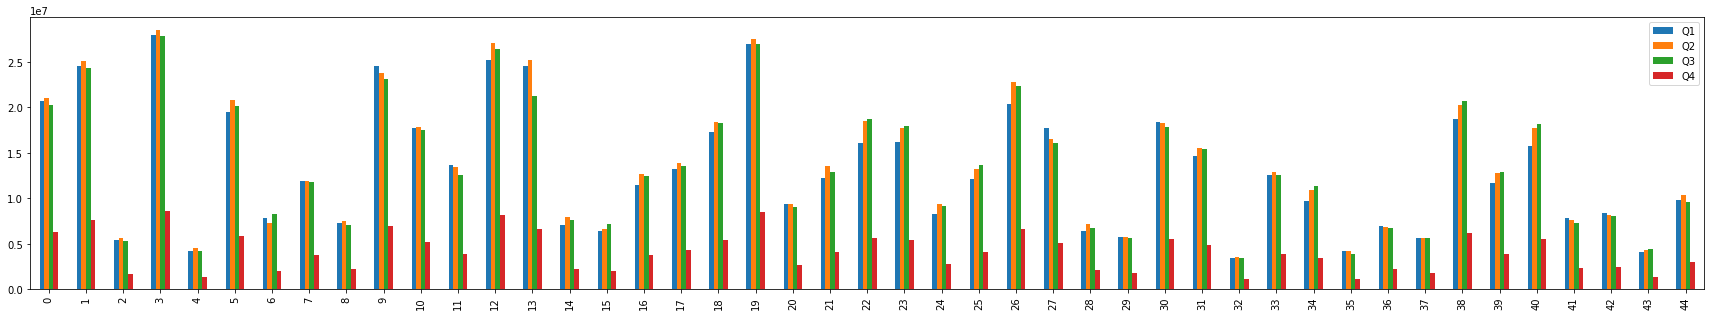

In [42]:

store_df_q_2012[['Q1','Q2','Q3','Q4']].plot(kind='bar',stacked=False,figsize=(30,5))  #shows the plot of 
 

In [43]:
store_df_q_2012['Q3_growth_rate'] = (store_df_q_2012.Q3-store_df_q_2012.Q2)*100/store_df_q_2012.Q2

In [44]:
store_df_q_2012['Q3_growth_rate'].max()

13.33077603073801

In [45]:
store_df_q_2012.sort_values('Q3_growth_rate',ascending=False).head(10)

,Store,Weekly_Sales_std,Weekly_Sales_mean,coeff_mean_to_std,Q1,Q2,Q3,Q4,Q3_growth_rate
6,7,112585.47,570617.31,5.07,7792647.21,7290859.27,8262787.39,2021262.60,13.330776
15,16,85769.68,519247.73,6.05,6400479.72,6564335.98,7121541.64,2016067.98,8.488378
34,35,211243.46,919724.98,4.35,9642858.59,10838313.00,11322421.12,3434129.81,4.466637
25,26,110431.29,1002911.84,9.08,12071075.04,13155335.57,13675691.91,4074341.77,3.955478
38,39,217466.45,1450668.13,6.67,18740604.09,20214128.46,20715116.23,6215814.07,2.478404
40,41,187907.16,1268125.42,6.75,15681607.44,17659942.73,18093844.01,5452445.75,2.456980
43,44,24762.83,302748.87,12.23,4109696.37,4306405.78,4411251.16,1360020.41,2.434638
23,24,167745.68,1356755.39,8.09,16130180.70,17684218.91,17976377.72,5395618.84,1.652088
39,40,119002.11,964128.04,8.10,11680404.16,12727737.53,12873195.37,3891070.28,1.142841
22,23,249788.04,1389864.46,5.56,16049454.58,18488882.82,18641489.15,5588152.20,0.825395


### The above data clearly says that store 7 has the highest growth rate among all, and it is 13.330776


In [46]:
walmart = walmart.drop(['index'],axis=1)

In [47]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [48]:
walmart.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [49]:
#walmart['Date'] = walmart['Date'].astype('str')

In [50]:
walmart.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [51]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [52]:
walmart[walmart.Date=='2012-11-26']

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [53]:
Super_Bowl=[]
Labour_Day =[]
Thank_Giving=[]
Christmas=[]

In [54]:
     for date in range(0,len(walmart['Date'])):
        if  (walmart['Date'][date] == '2010-12-02'or walmart['Date'][date] =='2011-02-11' or walmart['Date'][date] == '2012-02-10' or walmart['Date'][date] == '2012-10-02' or walmart['Date'][date] == '2011-11-02' or walmart['Date'][date] == '2012-10-02' or walmart['Date'][date] == '2010-02-12'):            
            Super_Bowl.append(1)
            Labour_Day.append(0)
            Thank_Giving.append(0)
            Christmas.append(0)
        elif (walmart['Date'][date] == '2010-09-10'or walmart['Date'][date] == '2011-09-09'or walmart['Date'][date] == '2012-09-07' or walmart['Date'][date] == '2012-07-09'or walmart['Date'][date] == '2010-10-09'):
            Labour_Day.append(1)
            Super_Bowl.append(0)
            Thank_Giving.append(0)
            Christmas.append(0)
        elif ( walmart['Date'][date] == '2010-11-26'or  walmart['Date'][date] == '2011-11-25'or  walmart['Date'][date] == '2012-11-23'):
            Super_Bowl.append(0)
            Labour_Day.append(0)
            Thank_Giving.append(1)
            Christmas.append(0)
        elif ( walmart['Date'][date] == '2010-12-31'or  walmart['Date'][date] == '2011-12-30'or  walmart['Date'][date] == '2012-12-28'):
            Super_Bowl.append(0)
            Labour_Day.append(0)
            Thank_Giving.append(0)
            Christmas.append(1)
        else:
            Super_Bowl.append(0)
            Labour_Day.append(0)
            Thank_Giving.append(0)
            Christmas.append(0)

### In the above loop i have defined how to fill the data after checking the date

In [55]:
sum(Christmas)

0

In [56]:

sum(Thank_Giving),sum(Super_Bowl),sum(Labour_Day),sum(Christmas)

(0, 0, 0, 0)

In [57]:
walmart['Thanks_Giving'] = Thank_Giving
walmart['Super_Bowl'] = Super_Bowl
walmart['Labor_Day'] = Labour_Day
walmart['Christmas'] = Christmas

In [58]:
walmart['Holiday'] = walmart.Thanks_Giving+walmart.Super_Bowl+walmart.Labor_Day+walmart.Christmas

In [59]:
walmart[(walmart.Holiday==0)&(walmart.Holiday_Flag==1)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Thanks_Giving,Super_Bowl,Labor_Day,Christmas,Holiday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,0,0,0,0,0
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787,0,0,0,0,0
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,0,0,0,0,0
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,0,0,0,0,0
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,0,0,0,0,0
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,0,0,0,0,0
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,0,0,0,0,0
6397,45,2012-02-10,803657.12,1,37.00,3.640,189.707605,8.424,0,0,0,0,0


In [60]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Thanks_Giving,Super_Bowl,Labor_Day,Christmas,Holiday
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,0,0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,0,0,0,0,0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,0,0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,0,0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,0,0


In [61]:
walmart_gist = round(walmart.groupby(['Holiday']).mean(),2)

## In the above code we can 

In [62]:
walmart_gist

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Thanks_Giving,Super_Bowl,Labor_Day,Christmas
Holiday,,,,,,,,,,,
0,23.0,1046964.88,0.07,60.66,3.36,171.58,8.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

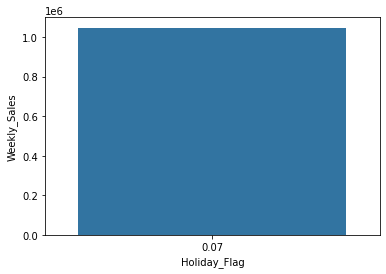

In [63]:
sns.barplot(data=walmart_gist,x='Holiday_Flag',y='Weekly_Sales')

In [64]:
#clearly we can see that the mean sales in holidays is more than than of mean sales in non holidays

In [65]:
mean_Thanks_giving = round(np.mean(walmart[walmart.Thanks_Giving==1]['Weekly_Sales']),2)
mean_Super_Bowl = round(np.mean(walmart[walmart.Super_Bowl==1]['Weekly_Sales']),2)
mean_Labor_Day = round(np.mean(walmart[walmart.Labor_Day==1]['Weekly_Sales']),2)
mean_Christmas = round(np.mean(walmart[walmart.Christmas==1]['Weekly_Sales']),2)

In [66]:
mean_Thanks_giving,mean_Super_Bowl,mean_Labor_Day,mean_Christmas  #mean sales in the holidays

(nan, nan, nan, nan)

In [67]:
walmart_gist

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Thanks_Giving,Super_Bowl,Labor_Day,Christmas
Holiday,,,,,,,,,,,
0,23.0,1046964.88,0.07,60.66,3.36,171.58,8.0,0.0,0.0,0.0,0.0


In [68]:
#we can see that mean weekly sales for Thanks Giving,Super Bowl and Labor Day are greater than the non holidays weekly sales

In [69]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Store          6435 non-null   int64         
 1   Date           6435 non-null   datetime64[ns]
 2   Weekly_Sales   6435 non-null   float64       
 3   Holiday_Flag   6435 non-null   int64         
 4   Temperature    6435 non-null   float64       
 5   Fuel_Price     6435 non-null   float64       
 6   CPI            6435 non-null   float64       
 7   Unemployment   6435 non-null   float64       
 8   Thanks_Giving  6435 non-null   int64         
 9   Super_Bowl     6435 non-null   int64         
 10  Labor_Day      6435 non-null   int64         
 11  Christmas      6435 non-null   int64         
 12  Holiday        6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(7)
memory usage: 653.7 KB


In [70]:
walmart['Month']  = pd.DatetimeIndex(walmart['Date']).month
walmart['Year']  =  pd.DatetimeIndex(walmart['Date']).year         #separating year and month for our convenience

In [71]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Thanks_Giving,Super_Bowl,Labor_Day,Christmas,Holiday,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,0,0,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,0,0,0,0,0,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,0,0,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,0,0,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,0,0,3,2010


In [72]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Store          6435 non-null   int64         
 1   Date           6435 non-null   datetime64[ns]
 2   Weekly_Sales   6435 non-null   float64       
 3   Holiday_Flag   6435 non-null   int64         
 4   Temperature    6435 non-null   float64       
 5   Fuel_Price     6435 non-null   float64       
 6   CPI            6435 non-null   float64       
 7   Unemployment   6435 non-null   float64       
 8   Thanks_Giving  6435 non-null   int64         
 9   Super_Bowl     6435 non-null   int64         
 10  Labor_Day      6435 non-null   int64         
 11  Christmas      6435 non-null   int64         
 12  Holiday        6435 non-null   int64         
 13  Month          6435 non-null   int64         
 14  Year           6435 non-null   int64         
dtypes: datetime64[ns](1),

In [73]:
monthly_sales_2010 = []
monthly_sales_2011 = []
monthly_sales_2012 = []
monthly_sales_2013 = []



In [74]:
len([1,12])

2

In [75]:
 def month_sales(year):
    result=[]
    for month in range(1,13):                                                                                     #defining a function that calculates monthly sales
        if sum(walmart[(walmart['Month']==month)&(walmart['Year']==year)]['Weekly_Sales']) != 0:
            result.append(round(sum(walmart[(walmart['Month']==month)&(walmart['Year']==year)]['Weekly_Sales']),2))
        else:
            result.append(0)
    return result 


In [76]:
month_sales(2010)

[0,
 190332983.04,
 181919802.5,
 231412368.05,
 186710934.34,
 192246172.36,
 232580125.98,
 187640110.89,
 177267896.37,
 217161824.02,
 202853370.14,
 288760532.72]

In [77]:
monthly_sales_2010 = pd.DataFrame((month_sales(2010)),columns=['2010'])
monthly_sales_2011 = pd.DataFrame((month_sales(2011)),columns=['2011'])
monthly_sales_2012 = pd.DataFrame((month_sales(2012)),columns=['2012'])
monthly_sales_2013 = pd.DataFrame((month_sales(2013)),columns=['2013'])

In [78]:
monthly_sales_2010.reset_index(inplace=True)
monthly_sales_2011.reset_index(inplace=True)
monthly_sales_2012.reset_index(inplace=True)
monthly_sales_2013.reset_index(inplace=True)

In [79]:
monthly_sales_2012

,index,2012
0,0,1.688945e+08
1,1,1.920636e+08
2,2,2.315097e+08
3,3,1.889209e+08
4,4,1.887665e+08
5,5,2.406103e+08
6,6,1.875095e+08
7,7,2.368508e+08
8,8,1.806455e+08
9,9,1.843617e+08


In [80]:
monthly_sales =pd.merge(monthly_sales_2010,monthly_sales_2011)

In [81]:
monthly_sales = pd.merge(monthly_sales,monthly_sales_2012)

In [82]:
monthly_sales = round(monthly_sales,2)

In [83]:
monthly_sales['Month'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [84]:
monthly_sales

,index,2010,2011,2012,Month
0,0,0.000000e+00,1.637040e+08,1.688945e+08,Jan
1,1,1.903330e+08,1.863313e+08,1.920636e+08,Feb
2,2,1.819198e+08,1.793564e+08,2.315097e+08,Mar
3,3,2.314124e+08,2.265265e+08,1.889209e+08,Apr
4,4,1.867109e+08,1.816482e+08,1.887665e+08,May
5,5,1.922462e+08,1.897734e+08,2.406103e+08,Jun
6,6,2.325801e+08,2.299114e+08,1.875095e+08,Jul
7,7,1.876401e+08,1.885993e+08,2.368508e+08,Aug
8,8,1.772679e+08,2.208477e+08,1.806455e+08,Sep
9,9,2.171618e+08,1.832613e+08,1.843617e+08,Oct


<AxesSubplot:xlabel='Month'>

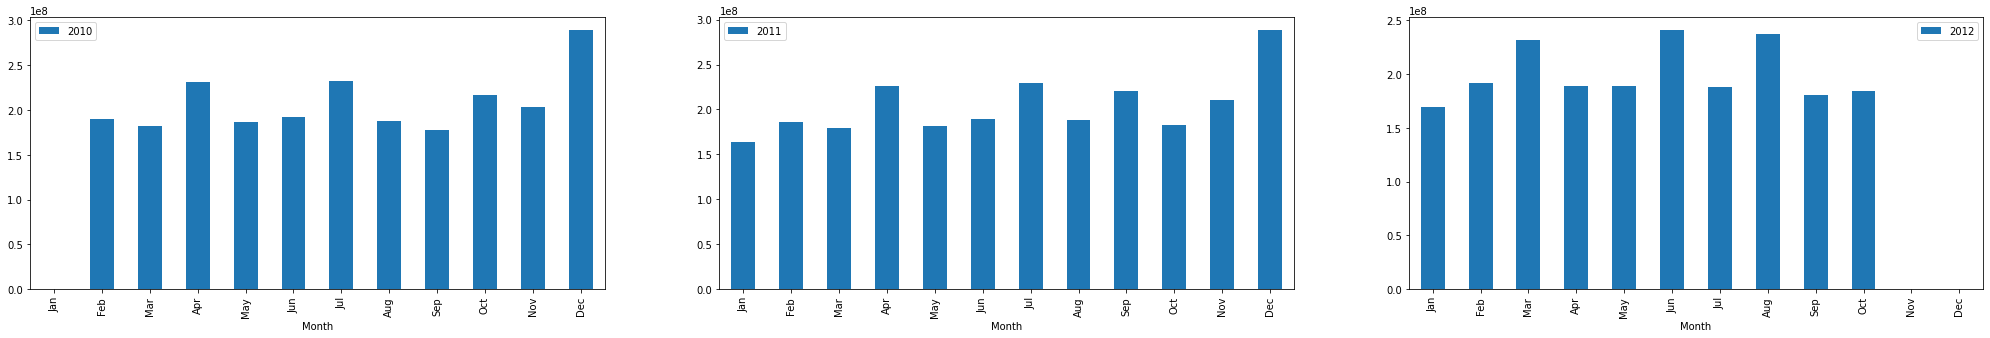

In [85]:
fig,axs = plt.subplots(1,3,sharex=True,figsize=(35,5))
monthly_sales.plot(kind='bar',x='Month',y='2010',ax=axs[0])
monthly_sales.plot(kind='bar',x='Month',y='2011',ax=axs[1])
monthly_sales.plot(kind='bar',x='Month',y='2012',ax=axs[2])

In [86]:
#This answers the 5th question